### Nama           : Jumadil
### Nim              : H071201061
### Mata kuliah : Machine Learning




# Mobile Price Classification Dataset

Dataset yang digunakan yaitu dataset yang mengklasifikasi rentang harga perangkat mobile. Untuk mengklasifikasi rentang perangkat mobile dapat dilihat berdasarkan parameter input seperti battery power, clock speed processor, memory internal, ketebalan, berat perangkat mobile, jumlah core, tinggi pixel, lebar pixel, ram, tinggi screen, lebar screen,  talk_time. Setiap baris pada data akan memberikan informasi tentang rentang harga perangkat mobile terkait. 


Berikut informasi yang lebih rinci dari atribut pada dataset diatas :

1.   battery_power : Total energi yang dapat disimpan baterai dalam satu waktu diukur dalam mAh. 
2.   blue : Apakah perangkat tersebut punya bluetooth atau tidak. 
3.   clock_speed : Kecepatan mikroprosesor  dalam mengeksekusi instruksi.
4.   dual_sim : Apakah perangkat tersebut mendukung dual sim atau tidak.
5.   fc : Ukuran mega pixel dari kamera depan perangkat tersebut.
6.   four_g : Apakah perangkat tersebut didukung jaringan 4g atau tidak.
7.   int_memory : Ukuran penyimpanan internal dalam Gigabytes.
8.   m_dep : Ketebalan perangkat tersebut dalam cm
9.   mobile_wt : Berat dari perangkat mobile tersebut.
10.  n_cores : Jumlah core dari processor.
11.  pc : Ukuran mega piksel dari kamera utama
12.  px_height : Ukuran resolusi dari tinggi perangkat mobile dalam pixel
13.  px_width : Ukuran resolusi dari lebar perangkat mobile dalam pixel
14.  ram : Jumlah ram pada perangkat mobile.
15.  sc_h : Tinggi screen perangkat dalam cm.
16.  sc_w : Lebar screen perngkat dalam cm.
17.  talk_time : Waktu terlama satu kali pengisian daya baterai hingga daya habis.
18.  three_g : Apakah perangkat tersebut didukung dengan jaringan 3g atau tidak.
19.  touch_screen : Apakah peranggkat tersebut touchscreen atau tidak.
20.  wifi : Apakah perangkat tersebut memiliki wifi atau tidak.
21.  price_range : Variabel target dengan nilai 0 (murah), 1 (sedang), 2 (mahal) dan 3 (sangat mahal).


**Berikut beberapa library yang akan digunakan :**



1.   Pandas digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data yang cepat, fleksibel dan ekspresif serta menyediakan fitur penanganan data yang hilang, pengindeksan yang rumit dan penyelarasan data.

2.   Numpy atau Numerical adalah library python untuk perhitungan matematis dan ilmiah. Numpy memiliki fungsi aljabar linear, Fourier transform, dan komputasi matriks yang digunakan untuk mengembangkan aplikasi dimana kecepatan dan sumber daya menjadi prioritas utama. 

3.   Matplotlib digunakan untuk membuat visualisasi data yang statis, animasi, dan interaktif. Menyediakan pilihan kustomisasi dan grafik yang sangat beragam.

4.   Seaborn digunakan untuk visualisasi data statistik, pembuatan hotmap dan visualisasi yang merangkum data dan menggambarkan distribusi. Digunakan juga pada frame dan array. Sekain itu juga berfungsi untuk plot dasar grafik batang, grafik garis, dan diagram lingkaran

5.  Scikit-Learn adalah library Machine Learning open source untuk python, meskipun terdaftar dalam alat Machine Learning, namun juga digunakan dalam Data Science. Kelebihan Scikit-Learn adalah penggunaan API yang mudah serta kecepatannya saat melakukan tolok ukur yang berbeda dalam dataset game.  Fitur utamanya termasuk regresi, pengelompokan, dan algoritma klasifikasi termasuk gradien, k-means, mesin dukungan vektor, DBSCAN, dan juga mampu beroperasi dengan SciPy dan NumPy.Dari library inilah, algortima knn di import.

6.  MLxtend (Machine Learning extensions) memiliki banyak fungsi menarik untuk analisis data sehari-hari dan tugas machine learning. Meskipun ada banyak library machine learning yang tersedia untuk Python seperti scikit-learn, TensorFlow, Keras, PyTorch, dll, namun, MLxtend menawarkan fungsionalitas tambahan dan dapat menjadi tambahan yang berharga untuk toolbox Data science data.








In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

## Basic Data Science dan ML Pipeline

## OSEMN Pipeline 
* O - Obtaining our data (Memperoleh data)
* S - Scrubbing / Cleaning our data  (Membersihkan data)
* E - Exploring / Visualizing our data (mengeksplor dan memvisualisasikan data yang memungkinkan kita untuk menemukan pola dari data )
* M - Modeling our data (memodelkan data yang akan memberikan prediksi)
* N - Interpreting our data (menafsirkan data)

# Obtaining Data

Dataset klasifikasi harga perangkat mobile ini diperoleh dari kaggle. Berikut adalah link dari dataset ini. https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [2]:
#Loading the dataset
df = pd.read_csv('train.csv')
df.shape

(2000, 21)

In [3]:
#Print the first 5 rows of the dataframe.
df.head(100)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
96,1355,0,2.3,0,10,1,23,0.2,132,5,...,651,891,880,19,4,8,1,1,0,0
97,1665,1,0.5,0,3,1,60,0.2,194,6,...,1572,1684,1601,18,17,14,1,0,0,2
98,657,0,2.5,0,0,0,37,0.7,141,2,...,476,961,1412,14,3,18,0,1,0,0


## Dasar EDA dan analisis statistik


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Method **DataFrame.describe()** menghasilkan statistik deskriptif yang meringkas tendens/kecenderungan sentral, dispersi, dan bentuk distribusi dataset, tidak termasuk nilai NaN. Method ini memberi tahu kita banyak hal tentang dataset. Satu hal penting adalah bahwa method explain() hanya berurusan dengan nilai numerik. Tidak bekerja dengan nilai kategori apa pun. Jadi jika ada nilai kategori dalam kolom, metode description() akan mengabaikannya dan menampilkan ringkasan untuk kolom lain kecuali parameter include="all" diatur.

Sekarang, mari kita pahami statistik yang dihasilkan oleh method description() :
* count memberi tahu kita jumlah baris kosong NoN dalam suatu fitur.
* berarti memberi tahu kita nilai rata-rata dari fitur itu.
* std memberi tahu kami Nilai Standar Deviasi dari fitur itu.
* min memberitahu kita nilai minimum dari fitur tersebut.
* 25%, 50%, dan 75% adalah persentil/kuartil dari masing-masing fitur. Informasi kuartil ini membantu kita mendeteksi Outlier.
* max memberitahu kita nilai maksimum dari fitur itu.

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Scrubbing / Cleaning Data

## Cleaning Missing Value


### Bisakah nilai minimum dari kolom sama dengan nol ?

Pada kolom-kolom tertentu, nilai nol tidak masuk akal dan karenanya nilai nol tersebut diindikasikan sebagai missing value (nilai yang hilang).

Berikut ini kolom-kolom atau variabel yang tidak boleh berisi nilai nol:
1. battery_power 
2. clock_speed
3. int_memory
4. m_dep
5. mobile_wt
6. n_cores
7. px_height
8. px_width
9. ram
10. sc_h
11. sc_w
12. talk_time

### Lebih baik mengganti nilai nol dengan NaN agar lebih mudah dalam penghitungan dan pengisiannya.

In [7]:
df_nan = df.copy(deep = True)
df_nan[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram' , 'sc_h', 'sc_w', 'talk_time']] = df_nan[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram' , 'sc_h', 'sc_w', 'talk_time']].replace(0,np.NaN)

## showing the count of Nans
print(df_nan.isnull().sum())

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64


### Untuk mengisi nilai NaN maka distribusi data harusnya dipahami terlebih dahulu

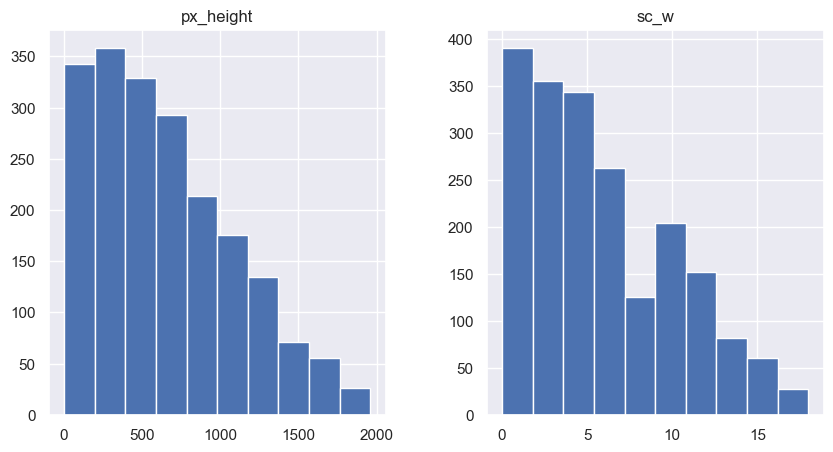

In [8]:
hist = df[['px_height', 'sc_w']].hist(figsize = (10,5))

### Mengisi nilai NaN berdasarkan distribusinya

In [9]:
df_nan['px_height'].fillna(df_nan['px_height'].median(), inplace = True)
df_nan['sc_w'].fillna(df_nan['sc_w'].mean(), inplace = True)

In [10]:
print(df_nan.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [11]:
df_clean = df_nan

## Plotting setelah mengisi Nilai Nan

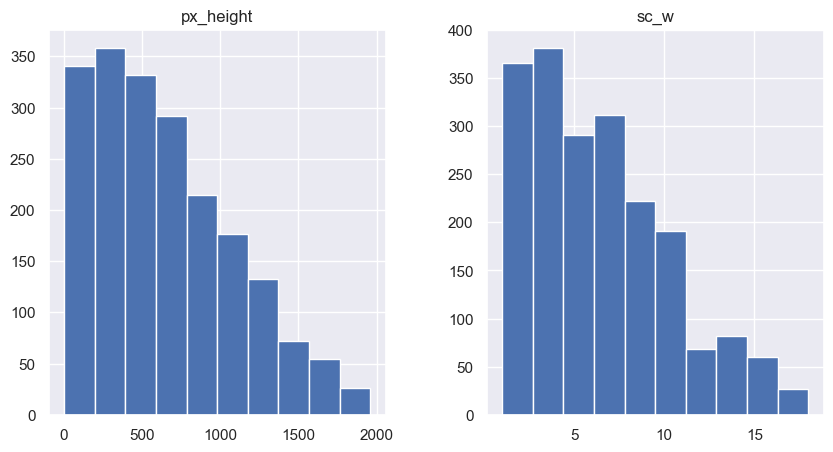

In [12]:
hist2 = df_clean[['px_height', 'sc_w']].hist(figsize = (10,5))

## Menghapus Data Outlier

In [13]:
df_clean.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Dataset ini memiliki tipe data numerik dan kategorik. Atribut-atribut dengan tipe data numerik seperti terdiri dari battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time. Sedangkan atribut-atribut dengan tipe data kategorik seperti blue, dual_sim, four_g, three_g, touch_screen, wifi, dan price_range. Namun data outlier biasanya hanya terdapat pada atribut yang bertipe data numerik. 

Sebelum menghapus data outlier, terlebih dahulu kita tentukan atribut-atribut yang berpotensi memiliki outlier dengan melihat sebaran datanya. 

In [14]:
column_outlier = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [15]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0


<AxesSubplot:ylabel='battery_power'>

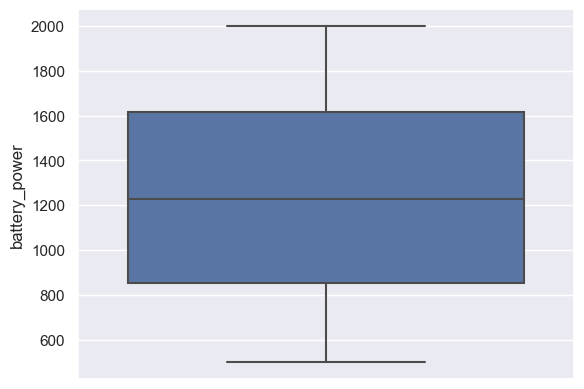

In [16]:
sns.boxplot(y = df_clean['battery_power'])

<AxesSubplot:ylabel='clock_speed'>

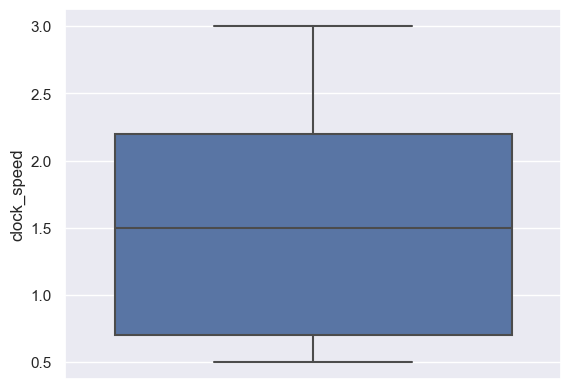

In [17]:
sns.boxplot(y = df_clean['clock_speed'])

<AxesSubplot:ylabel='fc'>

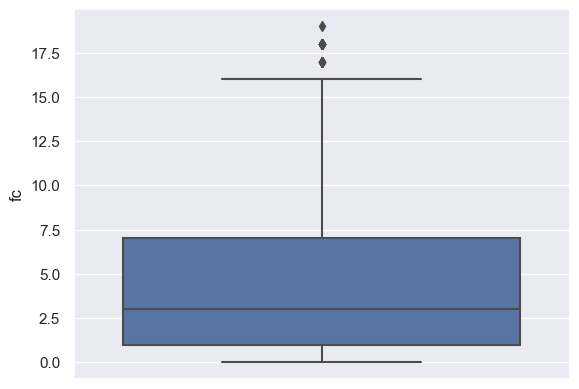

In [18]:
sns.boxplot(y = df_clean['fc'])

<AxesSubplot:ylabel='int_memory'>

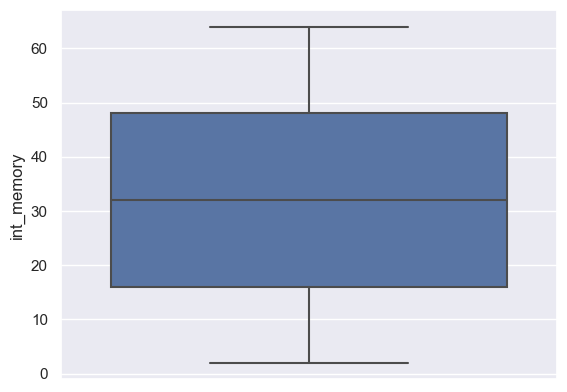

In [19]:
sns.boxplot(y = df_clean['int_memory'])

<AxesSubplot:ylabel='m_dep'>

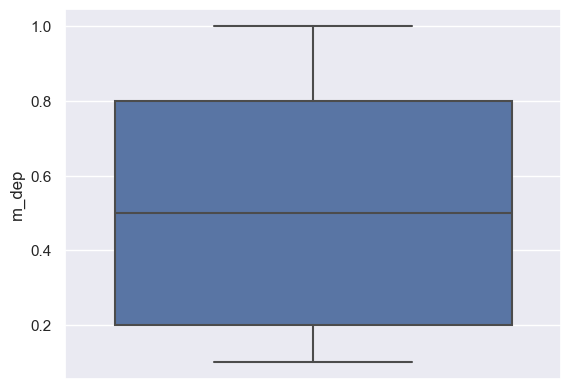

In [20]:
sns.boxplot(y = df_clean['m_dep'])

<AxesSubplot:ylabel='mobile_wt'>

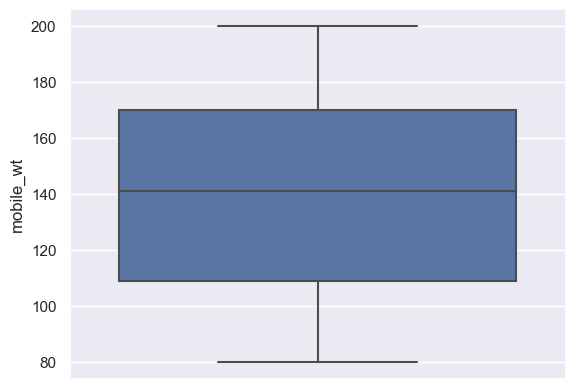

In [21]:
sns.boxplot(y = df_clean['mobile_wt'])

<AxesSubplot:ylabel='n_cores'>

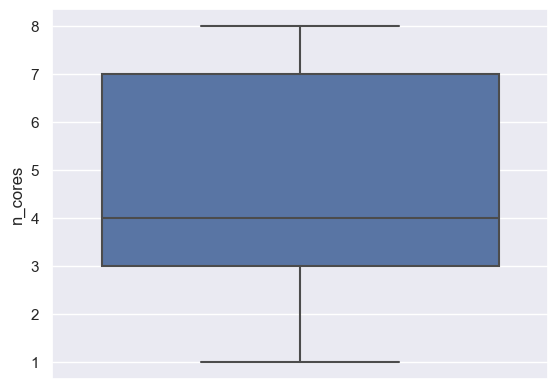

In [22]:
sns.boxplot(y = df_clean['n_cores'])

<AxesSubplot:ylabel='px_height'>

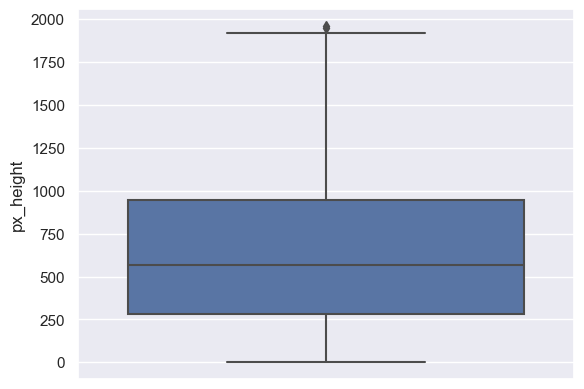

In [23]:
sns.boxplot(y = df_clean['px_height'])

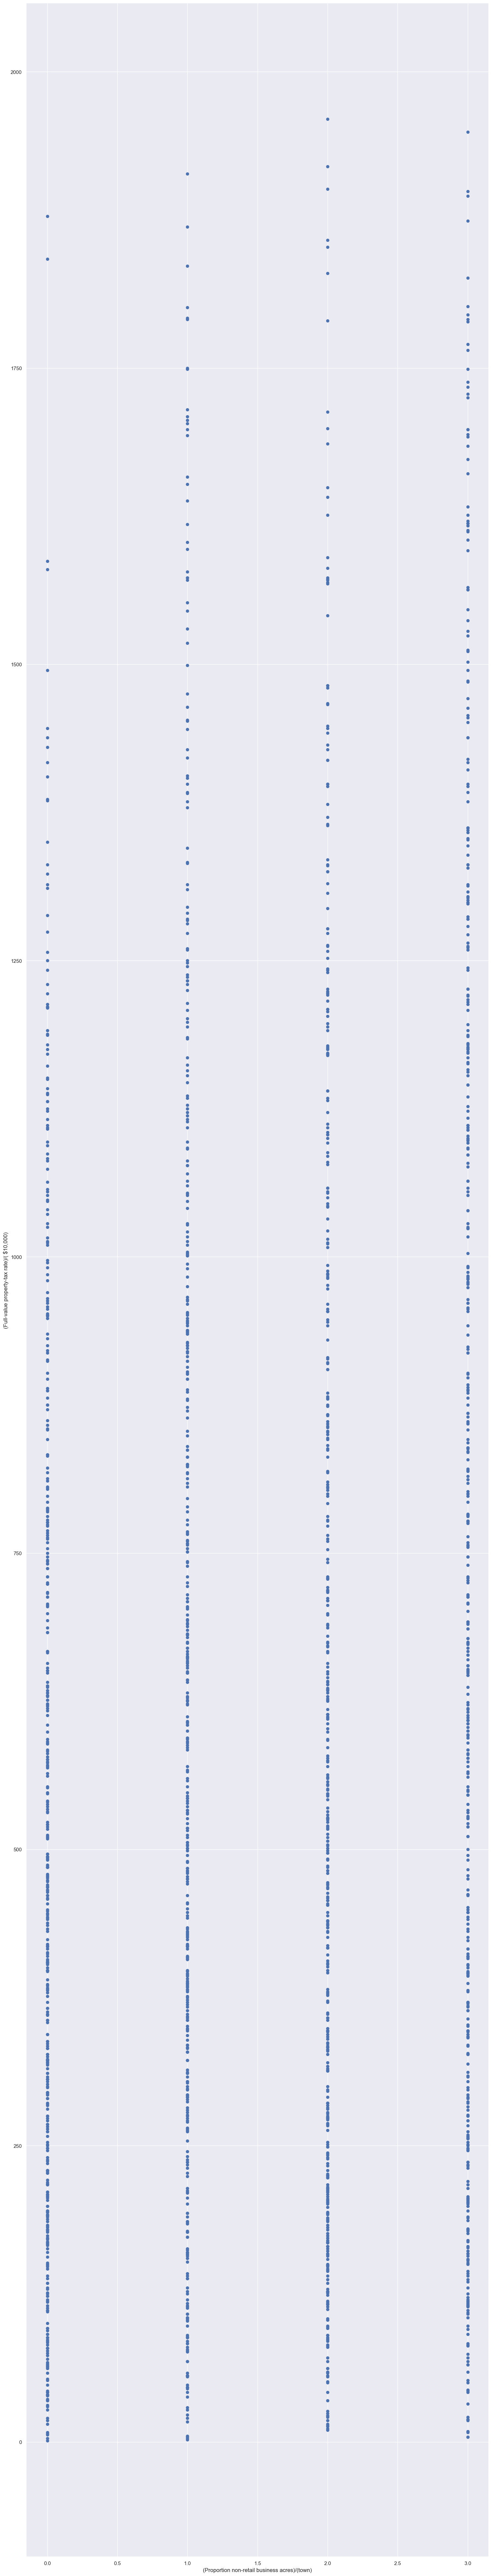

In [24]:

# Scatter plot
fig, ax = plt.subplots(figsize = (18,100))
ax.scatter(df_clean['price_range'], df_clean['px_height'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

<AxesSubplot:ylabel='px_width'>

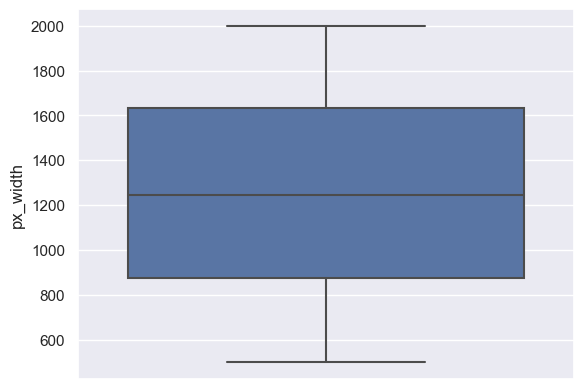

In [25]:
sns.boxplot(y = df_clean['px_width'])

<AxesSubplot:ylabel='ram'>

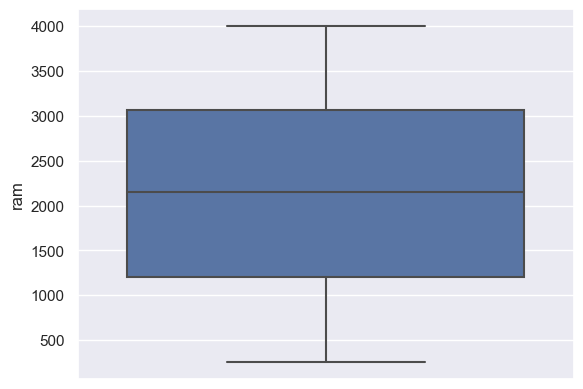

In [26]:
sns.boxplot(y = df_clean['ram'])

<AxesSubplot:ylabel='sc_w'>

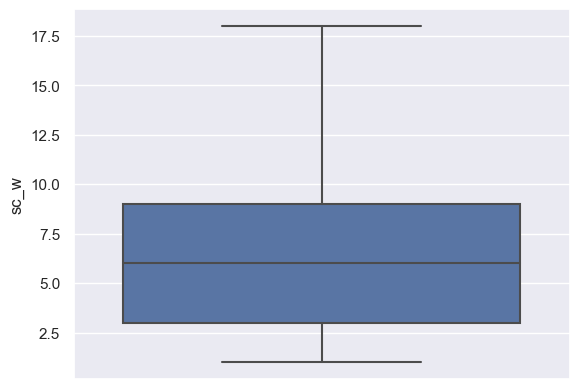

In [27]:
sns.boxplot(y = df_clean['sc_w'])

<AxesSubplot:ylabel='sc_h'>

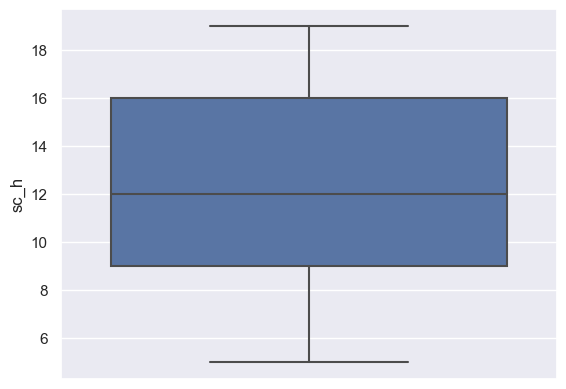

In [28]:
sns.boxplot(y = df_clean['sc_h'])

<AxesSubplot:ylabel='talk_time'>

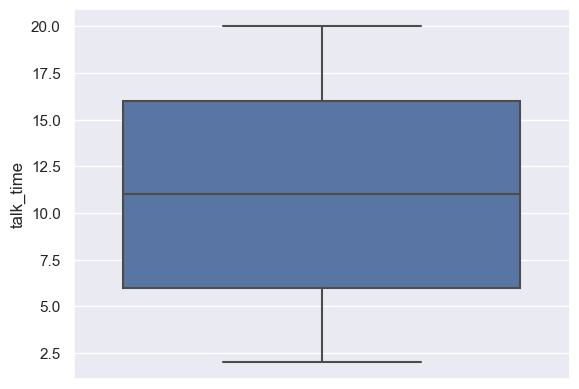

In [29]:
sns.boxplot(y = df_clean['talk_time'])

In [30]:
Q1 = df_clean[column_outlier].quantile(0.25)
Q3 = df_clean[column_outlier].quantile(0.75)
IQR = Q3 - Q1
print('IQR Value: ')
print(IQR)
print()
print('Max Value: ')
print(Q3 + 1.5*IQR)
print()
print('Min Value: ')
print(Q1 - 1.5*IQR)

IQR Value: 
battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
px_height         663.25
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                6.00
talk_time          10.00
dtype: float64

Max Value: 
battery_power    2760.500
clock_speed         4.450
fc                 16.000
int_memory         96.000
m_dep               1.700
mobile_wt         261.500
n_cores            13.000
px_height        1942.125
px_width         2770.375
ram              5850.000
sc_h               26.500
sc_w               18.000
talk_time          31.000
dtype: float64

Min Value: 
battery_power    -293.500
clock_speed        -1.550
fc                 -8.000
int_memory        -32.000
m_dep              -0.700
mobile_wt          17.500
n_cores            -3.000
px_height        -710.875
px_width         -262.625
ram             -1578.000
sc_h     

Dari visualisasi di atas atribut-atribut yang memiliki outlier (melebihi range q1 dan q3) berdasarkan sebaran data  yaitu fc, px_height.

In [31]:
df_clean_outlier = df_clean[~((df_clean < (Q1 -  1.5*IQR)) |(df_clean > (Q3 + 1.5*IQR))).any(axis=1)]
print(df_clean_outlier.shape)

(1980, 21)


<AxesSubplot:ylabel='fc'>

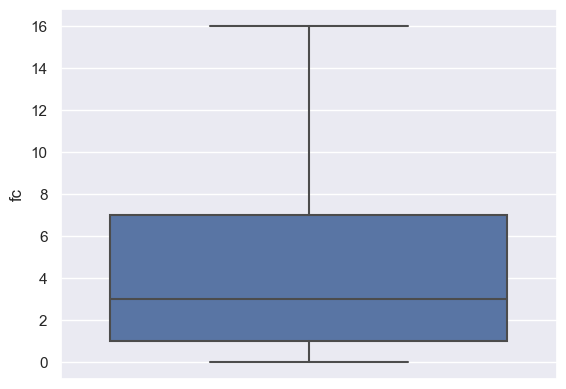

In [32]:
sns.boxplot(y = df_clean_outlier['fc'])

<AxesSubplot:ylabel='px_height'>

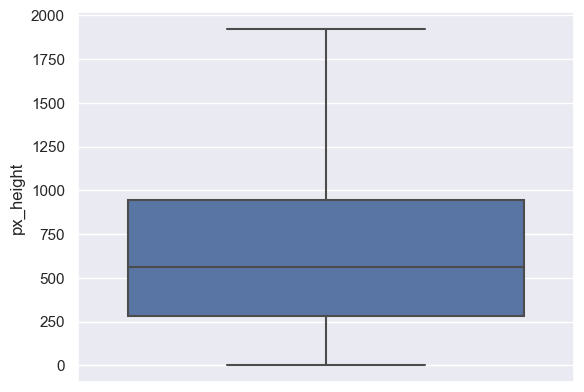

In [33]:
sns.boxplot(y = df_clean_outlier['px_height'])

# Exploring / Visualizing Data

In [34]:
## observing the shape of the data
df_clean_outlier.shape

(1980, 21)

2    496
0    496
1    495
3    493
Name: price_range, dtype: int64


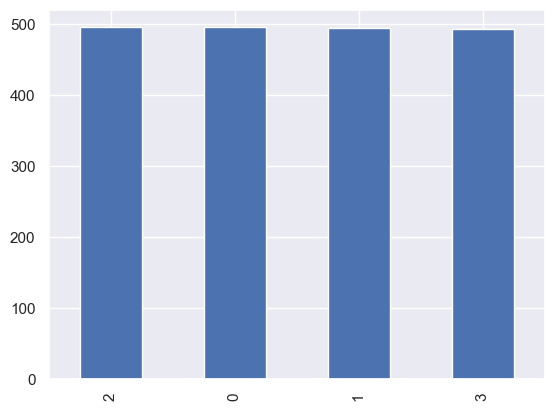

In [35]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {0: "#ff44aa", 
               1: "#33ffff",
               2: "#ffff33",
               3: "#33ffff"
               }
colors = df_clean_outlier["price_range"].map(lambda x: color_wheel.get(x-1))
print(df_clean_outlier.price_range.value_counts())
p=df_clean_outlier.price_range.value_counts().plot(kind="bar")


#### Grafik di atas menunjukkan bahwa distribusi data untuk kolom price_range pada dataset train sudah hampir merata.

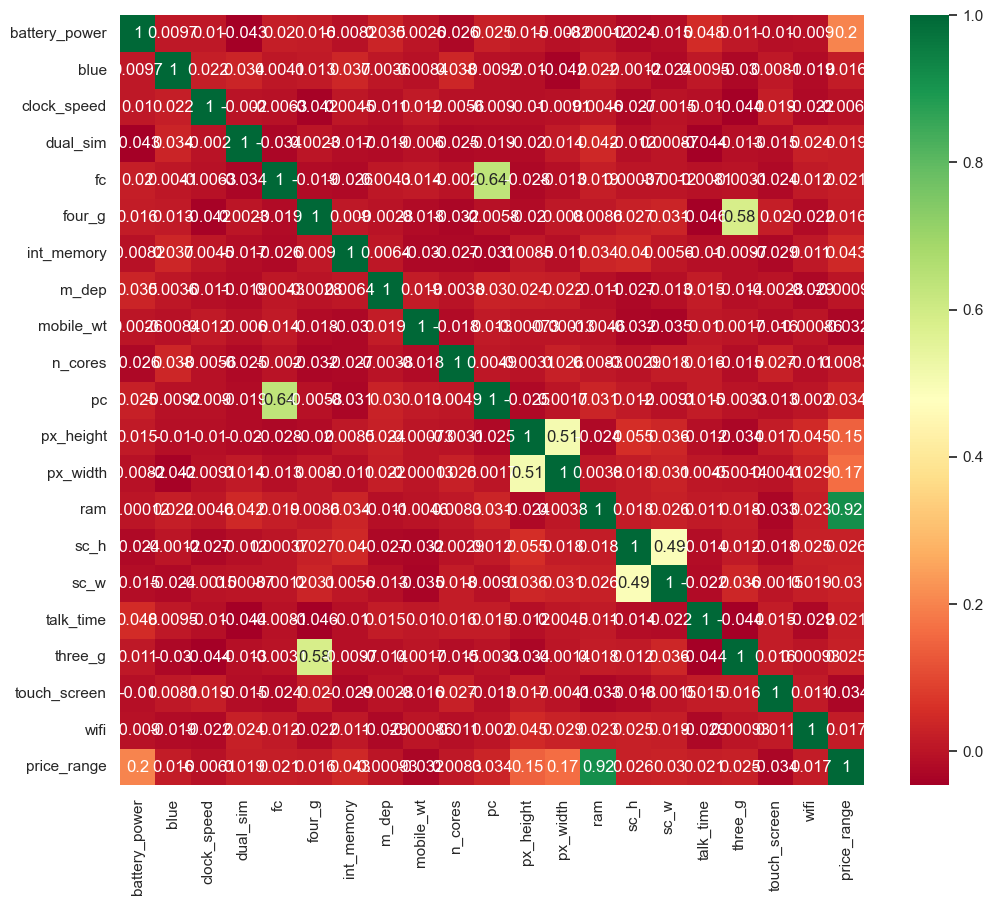

In [36]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df_clean_outlier.corr(), annot=True,cmap ='RdYlGn') 

## Selection Features


**Koefisien Korelasi Pearson**: membantu kita mengetahui hubungan antara dua entitas. Yang memberi ukuran kekuatan hubungan antara dua variabel. Nilai Koefisien Korelasi Pearson dapat berkisar antara -1 hingga +1. 1 berarti sangat berkorelasi dan 0 berarti tidak ada korelasi.

Heatmap adalah representasi informasi dua dimensi dengan bantuan warna. Heatmap dapat membantu pengguna memvisualisasikan informasi sederhana atau kompleks.

#### Pasangan plot dibangun di atas dua gambar dasar yaitu histogram dan scatter plot. Histogram pada diagonal memungkinkan kita untuk melihat distribusi satu variabel sementara scatter plot pada segitiga atas dan bawah menunjukkan hubungan (atau ketiadaan) antara dua variabel.


In [37]:
corr_data = df_clean_outlier.corr()
corr_data['price_range']

battery_power    0.200763
blue             0.015798
clock_speed     -0.006120
dual_sim         0.019016
fc               0.021120
four_g           0.015906
int_memory       0.043458
m_dep           -0.000925
mobile_wt       -0.031628
n_cores          0.008307
pc               0.033871
px_height        0.145014
px_width         0.165132
ram              0.917009
sc_h             0.025641
sc_w             0.029892
talk_time        0.020582
three_g          0.025462
touch_screen    -0.033888
wifi             0.017192
price_range      1.000000
Name: price_range, dtype: float64

In [38]:
series = abs(corr_data['price_range'])
sorted_series=series.sort_values(ascending=False)
sorted_series = sorted_series.drop('price_range')
for i in sorted_series:
    i = abs(i)
    if i> 0.02:
        print(i)
        

0.9170093662087618
0.20076343388064946
0.16513190169259837
0.1450143932437371
0.04345820613198526
0.033888248178668416
0.03387135206493891
0.031627644140591785
0.029891618595171105
0.025640638292277265
0.025462312619821806
0.021119951213488152
0.020581618670789437


In [39]:
series = abs(corr_data['price_range'])
sorted_series=series.sort_values(ascending=False)
sorted_series = sorted_series.drop('price_range')
index_list = list(sorted_series.index.values)
feature_top4 = index_list[:4]
feature_top4

['ram', 'battery_power', 'px_width', 'px_height']

In [40]:
data_selected = df_clean_outlier[feature_top4]
data_selected

,ram,battery_power,px_width,px_height
0,2549,842,756,20.0
1,2631,1021,1988,905.0
2,2603,563,1716,1263.0
3,2769,615,1786,1216.0
4,1411,1821,1212,1208.0
...,...,...,...,...
1995,668,794,1890,1222.0
1996,2032,1965,1965,915.0
1997,3057,1911,1632,868.0
1998,869,1512,670,336.0


In [41]:
data_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
ram,1980.0,2125.135859,1084.556984,256.0,1209.75,2146.5,3066.50,3998.0
battery_power,1980.0,1236.402020,439.568762,501.0,849.50,1224.0,1614.00,1998.0
px_width,1980.0,1249.646465,431.606730,500.0,874.00,1247.0,1629.25,1998.0
px_height,1980.0,641.755051,439.491741,1.0,282.75,563.5,942.00,1920.0


In [42]:
data_selected_columns= data_selected.columns

## Normalization Data (Penskalaan Data)

### Kenapa menskalakan data untuk KNN?

Selalu disarankan untuk membawa semua fitur ke skala yang sama untuk menerapkan algoritma berbasis jarak seperti KNN.

Mari kita lihat contoh penghitungan jarak menggunakan dua fitur yang besaran/rentangnya sangat bervariasi.

Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

Kita dapat membayangkan bagaimana fitur dengan jangkauan yang lebih besar dengan menaungi atau mengurangi fitur yang lebih kecil sepenuhnya dan ini akan berdampak pada kinerja semua model berbasis jarak karena akan memberikan bobot yang lebih tinggi untuk variabel yang memiliki magnitudo lebih tinggi.

Dalam Machine Learning, StandardScaler digunakan untuk mengubah ukuran distribusi nilai sehingga rata-rata dari nilai yang diamati adalah 0 dan standar deviasi adalah 1. StandardScaler berperan saat karakteristik kumpulan data input sangat berbeda di antara rentangnya, atau hanya saat diukur dalam satuan ukuran yang berbeda.StandardScaler menghapus rata-rata dan menskalakan data ke varian satuan. 

Selisih di feature awal ini dapat menimbulkan masalah bagi banyak model pembelajaran mesin. Misalnya, untuk model yang berdasarkan perhitungan jarak, jika salah satu fitur memiliki rentang nilai yang lebar, maka jarak akan diatur oleh karakteristik tersebut.

Gagasan di balik StandardScaler adalah bahwa variabel yang diukur pada skala yang berbeda tidak memberikan kontribusi yang sama pada kecocokan model dan fungsi pembelajaran model dan pada akhirnya dapat menciptakan bias. 

Jadi, untuk mengatasi masalah ini, kita perlu menstandarkan data (μ = 0, σ = 1) yang biasanya digunakan sebelum kita mengintegrasikannya ke dalam model pembelajaran mesin.



In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_selected),
        columns=data_selected_columns)

In [44]:
X

,ram,battery_power,px_width,px_height
0,0.390916,-0.897474,-1.144030,-1.415071
1,0.466543,-0.490154,1.711141,0.599127
2,0.440719,-1.532348,1.080779,1.413910
3,0.593816,-1.414020,1.243004,1.306942
4,-0.658625,1.330271,-0.087246,1.288734
...,...,...,...,...
1975,-1.343870,-1.006700,1.484025,1.320597
1976,-0.085896,1.657948,1.657838,0.621886
1977,0.859429,1.535069,0.886108,0.514918
1978,-1.158494,0.627132,-1.343336,-0.695877


In [45]:
y = df_clean_outlier.price_range

In [46]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

# Modeling Data

## Test Train Split dan Cross Validation methods



***Train Test Split*** : Untuk memiliki titik data yang tidak diketahui untuk menguji data daripada menguji dengan titik yang sama dengan model yang dilatih. Ini membantu menangkap kinerja model jauh lebih baik.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: Ketika model dipecah menjadi pelatihan dan pengujian, ada kemungkinan bahwa jenis titik data tertentu dapat seluruhnya menjadi bagian pelatihan atau pengujian. Ini akan menyebabkan model berkinerja buruk. Oleh karena itu masalah over-fitting dan underfitting dapat dihindari dengan baik dengan teknik validasi silang.

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratifikasi parameter membuat pemisahan sehingga proporsi nilai dalam sampel yang dihasilkan akan sama dengan proporsi nilai yang diberikan pada parameter stratifikasi.

Misalnya, jika variabel y adalah variabel kategorikal biner dengan nilai 0 dan 1 dan terdapat 25% nol dan 75% satu, stratify=y akan memastikan bahwa pembagian acak Anda memiliki 25% nol dan 75% satu.


In [47]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=42, stratify=y)

In [48]:
X_train.head()

,ram,battery_power,px_width,px_height
94,-0.652169,0.194781,1.715776,-1.057750
1842,-1.278389,-1.336652,0.698390,-0.677670
1892,0.144671,-1.231977,-0.089564,0.335119
485,0.899086,-0.863341,-0.699068,-1.103269
995,1.016214,-0.617584,-1.382734,-0.784639


In [49]:
y_train.head()

94      1
1859    0
1912    1
492     2
1004    2
Name: price_range, dtype: int64

In [50]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(2,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [51]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 95.75757575757575 % and k = [2]


In [52]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 90.1010101010101 % and k = [20]


In [53]:
X_test.head()

,ram,battery_power,px_width,px_height
231,-1.307902,0.652163,0.825853,-1.123752
75,-0.286951,-0.949811,-0.017721,-0.689049
98,-0.399468,-1.464082,0.156092,1.345632
426,-0.782209,0.517906,0.211713,-0.509251
728,-1.678654,-1.668879,0.095837,0.310084


In [54]:
y_test.head()

235    0
75     1
99     1
433    1
736    0
Name: price_range, dtype: int64

## Result Visualisation

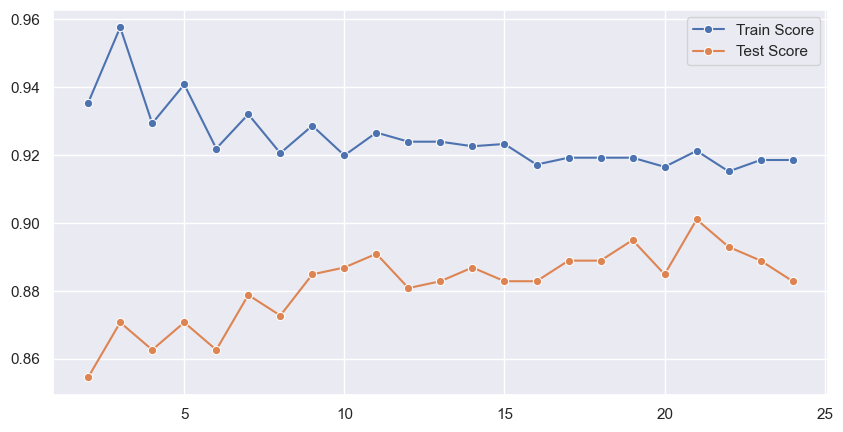

In [55]:
plt.figure(figsize=(10,5))
p = sns.lineplot(range(2,25),train_scores,marker='o',label='Train Score')
p = sns.lineplot(range(2,25),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 21 hence 21 is used for the final model

In [56]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(21)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.901010101010101

# Interpreting Data

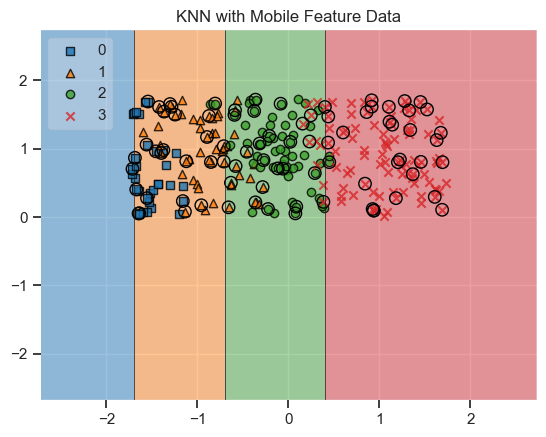

In [57]:
value = 1
width = 1
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={1: value,2: value, 3: value},
                      filler_feature_ranges={1: width,2: width, 3: width},
                      X_highlight=X_test.values)

plt.title('KNN with Mobile Feature Data')
plt.show()

# Model Performance Analysis

## 1. Confusion Matrix

Confusion Matrix adalah teknik yang digunakan untuk meringkas kinerja algoritma klasifikasi yaitu memiliki keluaran biner.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

In [58]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,120,4,0,0,124
1,7,111,6,0,124
2,0,14,106,4,124
3,0,0,14,109,123
All,127,129,126,113,495


In [59]:
X_test.shape

(495, 4)

Text(0.5, 20.049999999999997, 'Predicted label')

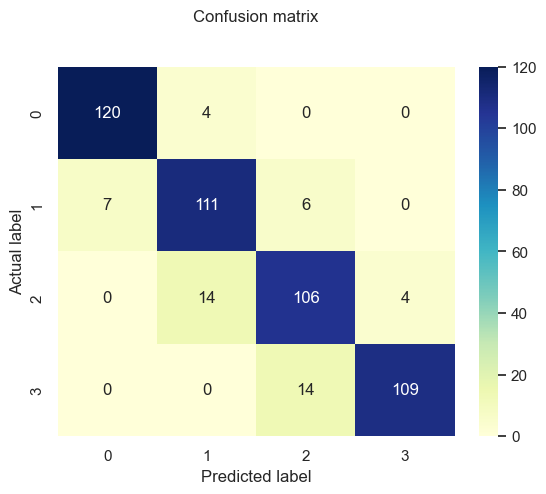

In [60]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Dari 495 data tes, 446 diprediksi dengan benar yang terdiri dari 120 data untuk range harga rendah (0), sebanyak 111 data untuk range harga sedang (1), sebanyak 106 data untuk range harga tinggi (2) dan sebanyak 109 data untuk range harga sangat tinggi (3)

## 2. Classification Report

Report termasuk Accuration, Precision, Recall and F1-Score.

#### Accuration Score

***Accuration*** - Akurasi yaitu persentase jumlah data yang diprediksi benar dari seluruh data yang diuji. Akurasi menyatakan ketepatan model dalam melakukan prediksi.

        TP – True Positives
        FP – False Positives

        Precision = TP/(TP + FP)
        
#### Precision Score

***Precision*** - Presisi yaitu persentase jumlah data yang sebenarnya positif dan diprediksi benar dari seluruh data yang diprediksi positif. 

        TP – True Positives
        FP – False Positives

        Precision = TP/(TP + FP)
        
  
#### Recall Score

  ***Recall (Sensitivity)*** - Recall yaitu persentase jumlah data yang sebenarnya positif dan diprediksi benar dari seluruh data yang sebenarnya positif. 
  
  
        FN – False Negatives

        Recall = TP/(TP+FN)
        
        
#### F1 Score

***F1 score*** - F1 score adalah rata-rata harmonik dari presisi dan recall.
  
        F1 = 2 x (precision x recall)/(precision + recall)
        

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       124
           1       0.86      0.90      0.88       124
           2       0.84      0.85      0.85       124
           3       0.96      0.89      0.92       123

    accuracy                           0.90       495
   macro avg       0.90      0.90      0.90       495
weighted avg       0.90      0.90      0.90       495



Dari classification report di atas, dapat disimpulkan model yang telah dibuat mampu mengenali data paling baik di rentang harga 3 atau sangat mahal, dikarenakan nilai f1 score-nya lebih tinggi dibanding rentang harga yang lain.